In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
data = pd.read_csv("Auction_master_train.csv")
data.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [5]:
data.shape

(1933, 41)

1. correlation 파악

In [13]:
data.corr()['Hammer_price']

Auction_key                   -0.418769
Claim_price                    0.267728
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
Total_land_gross_area          0.070466
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
addr_bunji1                   -0.003139
addr_bunji2                   -0.003641
Total_floor                    0.220830
Current_floor                  0.198013
road_bunji1                    0.020404
road_bunji2                    0.206681
point.y                        0.295698
point.x                       -0.296312
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

- 총감정가, 최저매각가격(입찰 시 입찰인이 최저로 제시해야 하는 금액) 변수와 y변수인 Hammer_price의 상관관계가 과하게 크다) 
- x변수 그대로 사용하면 다른 변수의 영향력이 없어질 것으로 보임
- 어떻게 처리할 것인가..?

In [42]:
data.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

면적 관련 변수들의 correlation을 살펴보자

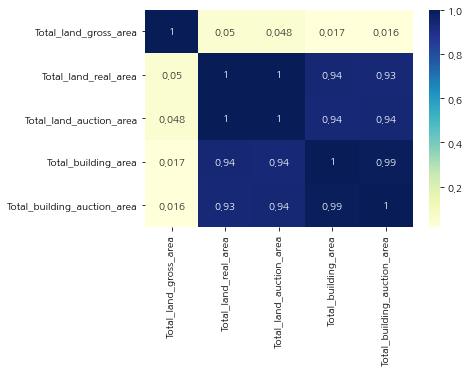

In [48]:
sns.heatmap(data.iloc[:,8:13].corr(),annot=True,cmap='YlGnBu')

- 해석력 유지할려면 떨궈서 총건물경매면적, 총토지전체면적 변수만 사용
- FA 방법 사용해서 차원 축소하자(공분산 행렬의 구조를 유지하면서 잠재변수를 찾아서 차원축소하는 방법, 유사한 변수끼리 묶어준다)

2. 이상치 제거(시군구 별로 box plot을 살펴보자)

In [32]:
data['addr_do'].unique() #시 도

array(['부산', '서울'], dtype=object)

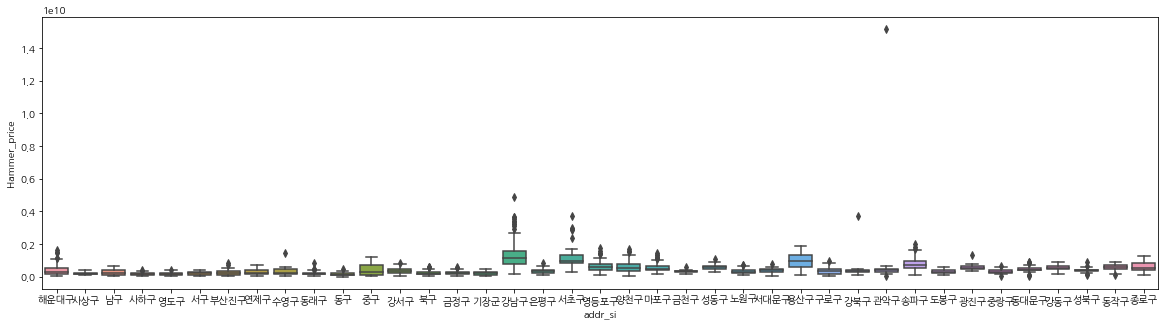

In [31]:
figure,ax1 = plt.subplots()
figure.set_size_inches(20,5)

sns.boxplot(x='addr_si',y='Hammer_price',data=data)

시군구 별로 이상치 제거의 필요성이 보임

3. 카테고리 변수 처리

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_key                  1933 non-null   int64  
 1   Auction_class                1933 non-null   object 
 2   Bid_class                    1933 non-null   object 
 3   Claim_price                  1933 non-null   int64  
 4   Appraisal_company            1933 non-null   object 
 5   Appraisal_date               1933 non-null   object 
 6   Auction_count                1933 non-null   int64  
 7   Auction_miscarriage_count    1933 non-null   int64  
 8   Total_land_gross_area        1933 non-null   float64
 9   Total_land_real_area         1933 non-null   float64
 10  Total_land_auction_area      1933 non-null   float64
 11  Total_building_area          1933 non-null   float64
 12  Total_building_auction_area  1933 non-null   float64
 13  Total_appraisal_pr

In [6]:
data['Auction_class'].unique()

array(['임의', '강제'], dtype=object)

In [8]:
data['Bid_class'].unique()

array(['개별', '일반', '일괄'], dtype=object)

4. NA값 처리

In [3]:
data.isna().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [33]:
data.shape

(1933, 41)

- 대부분의 값이 na값이어서 떨구는게 맞을 듯..?